# Generate embeddings

In [42]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import numpy as np
from pathlib import Path

In [43]:
filename2 = Path("data/eecs_courses.csv")
df = pd.read_csv(filename2, index_col=0)
df_undergrad = df[:'EECS 499']
df_undergrad.tail()

,course_name,course_description
course_number,,
EECS 495,Accessible Computing,Team-based development of technology systems f...
EECS 496,Major Design Experience Professionalism,Design principles for multidisciplinary team p...
EECS 497,Human-Centered Software and Design and Develop...,"Team-based, user-centered design and developme..."
EECS 498,Special Topics,Topics of current interest selected by the fac...
EECS 499,Directed Study,Provides an opportunity for undergraduate stud...


In [3]:
# Load https://huggingface.co/sentence-transformers/all-mpnet-base-v2
model = SentenceTransformer("all-mpnet-base-v2")

In [27]:
embeddings = model.encode(df_undergrad['course_description'].tolist())
print(embeddings.shape)
print(embeddings)

(103, 768)
[[-0.02639575 -0.06521773 -0.02965975 ...  0.00824184  0.04098037
  -0.06253516]
 [-0.04379505 -0.05937223 -0.00291988 ... -0.03498124  0.01252325
  -0.03586274]
 [ 0.00919127 -0.04039784 -0.04553433 ... -0.01927741  0.07235966
  -0.03886139]
 ...
 [ 0.03392852 -0.02317385 -0.06485965 ...  0.02022938  0.05733963
  -0.0245689 ]
 [ 0.00041335 -0.03093733 -0.02276972 ... -0.00162191  0.01514619
  -0.01262279]
 [-0.01164795 -0.04896687 -0.04725422 ... -0.01618973 -0.02929752
  -0.06580006]]


# Analyze Results


## PCA

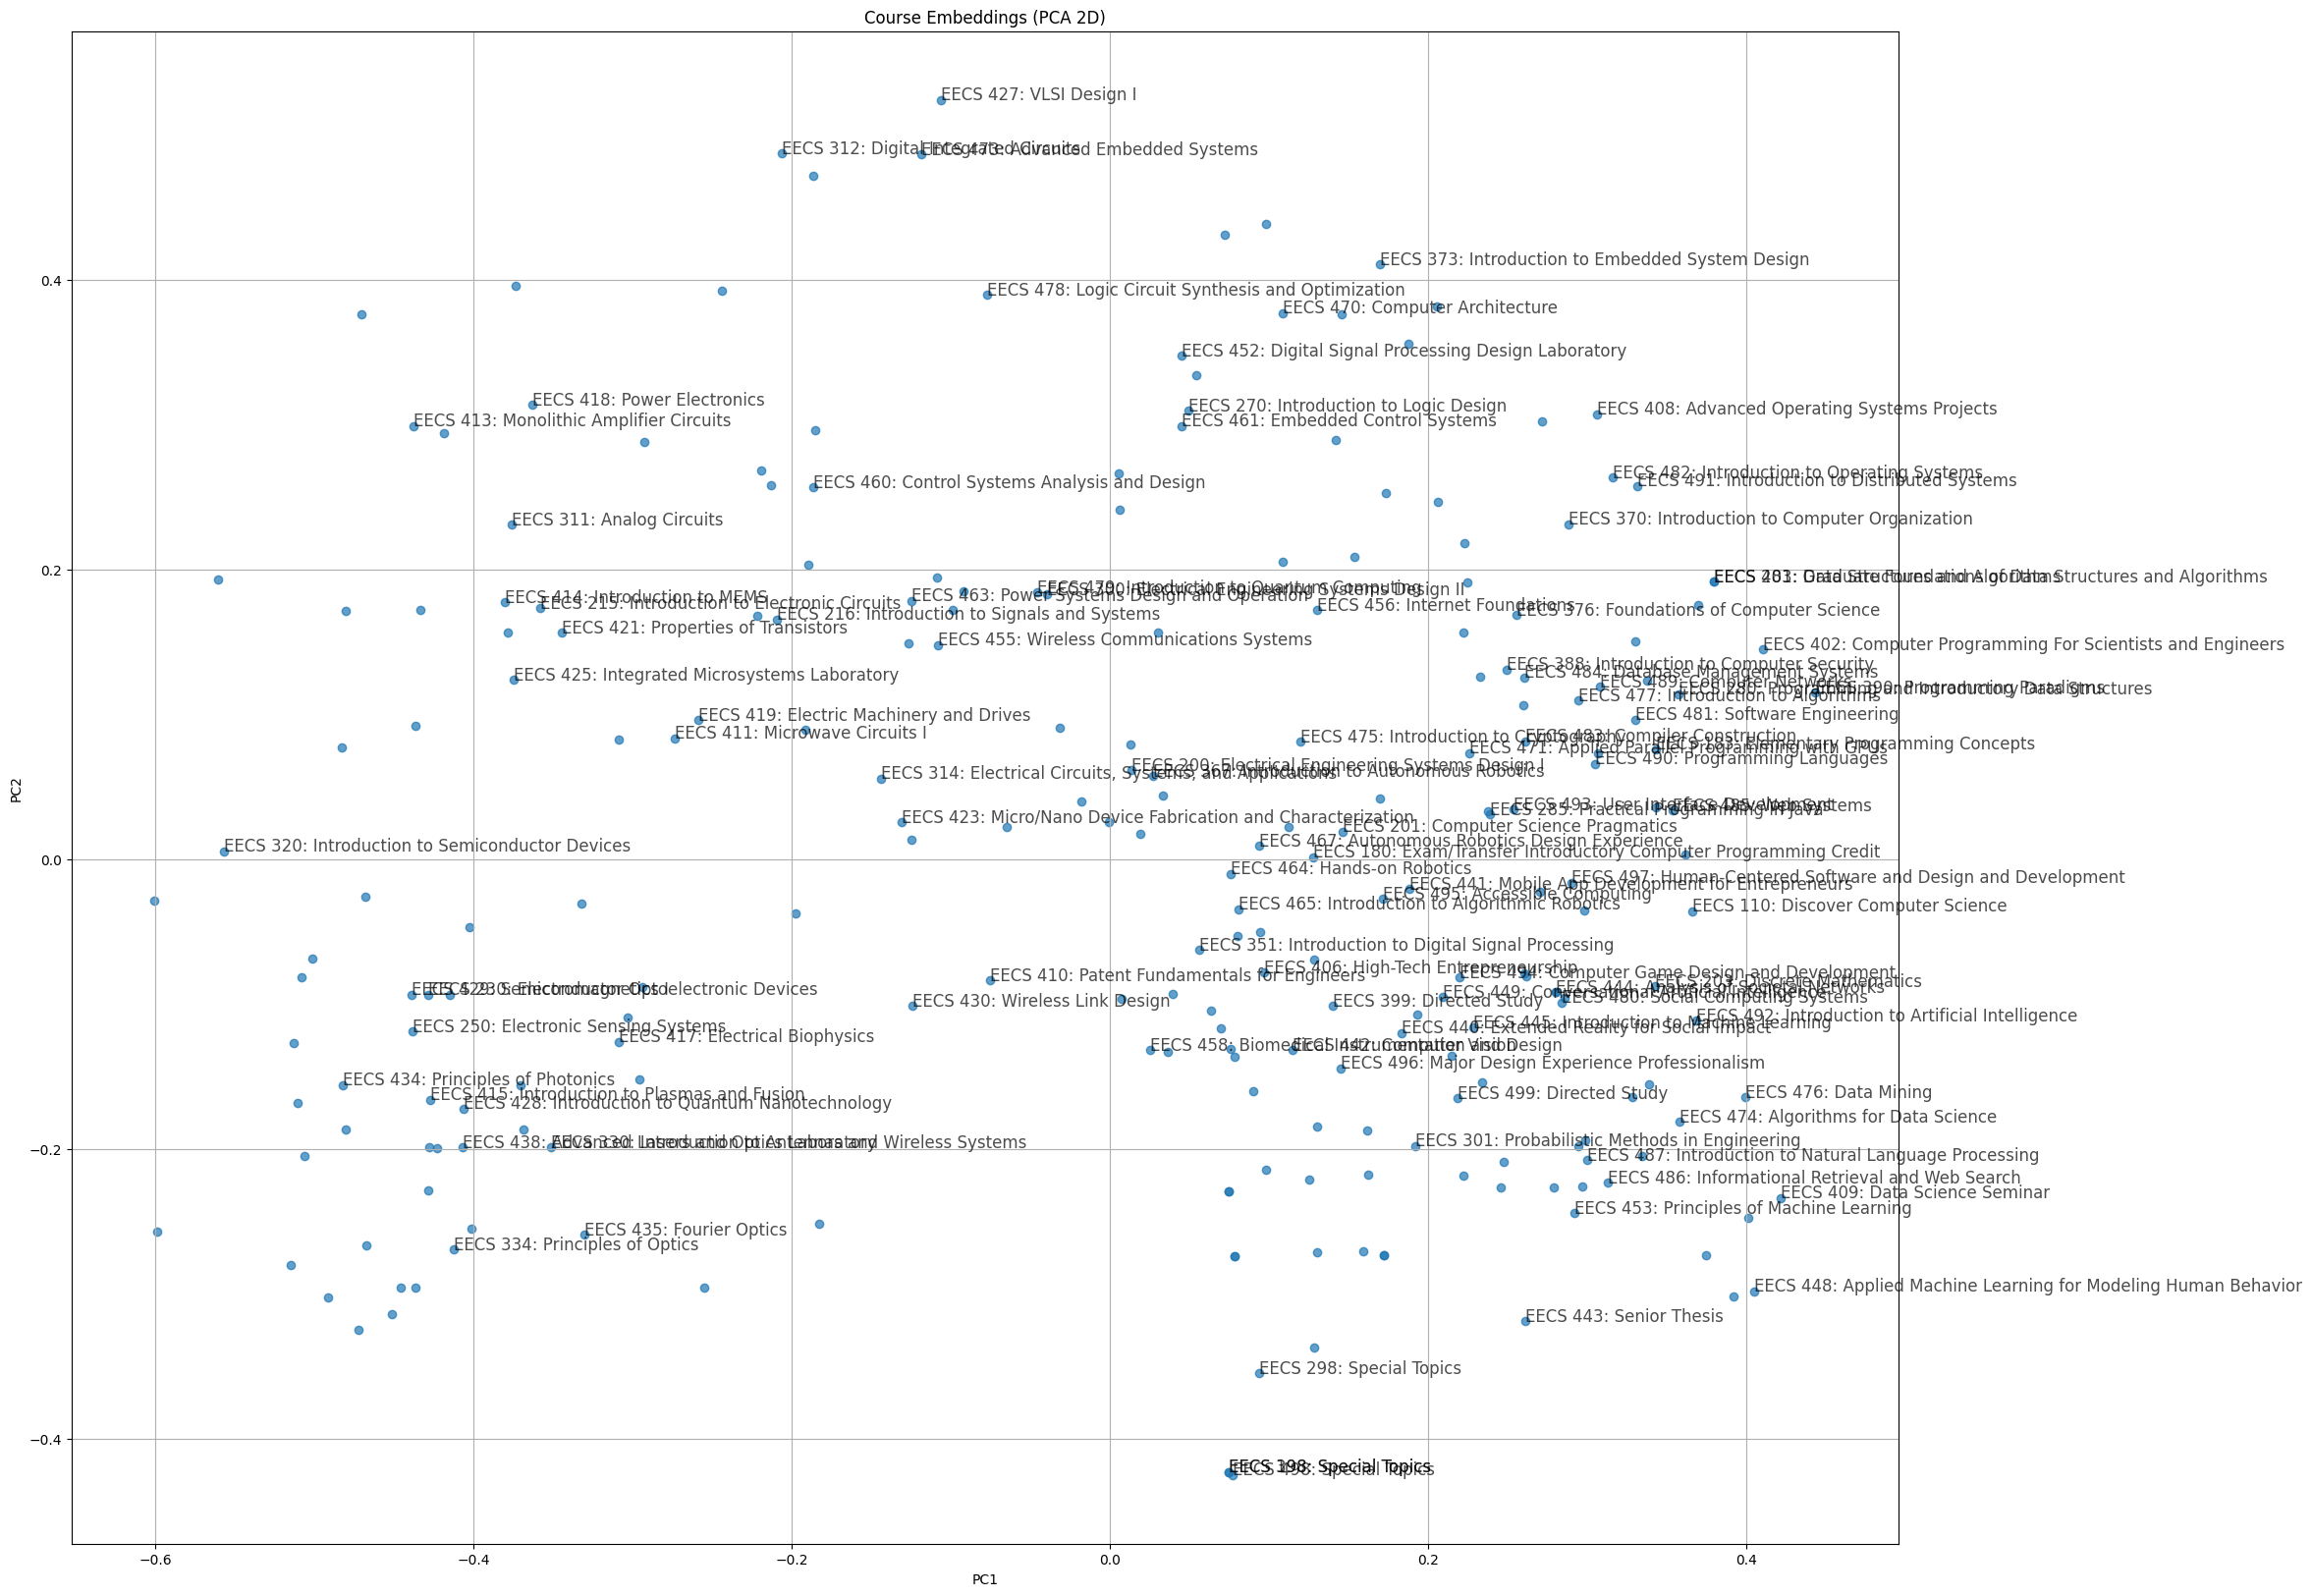

In [5]:
# Visualize embeddings using PCA (2D)
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(24, 20))  # Increased image size
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)
for i, (course_number, row) in enumerate(df_undergrad.iterrows()):
    label = f"{course_number}: {row['course_name']}"
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=12, alpha=0.7)
plt.title('Course Embeddings (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## t-SNE

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


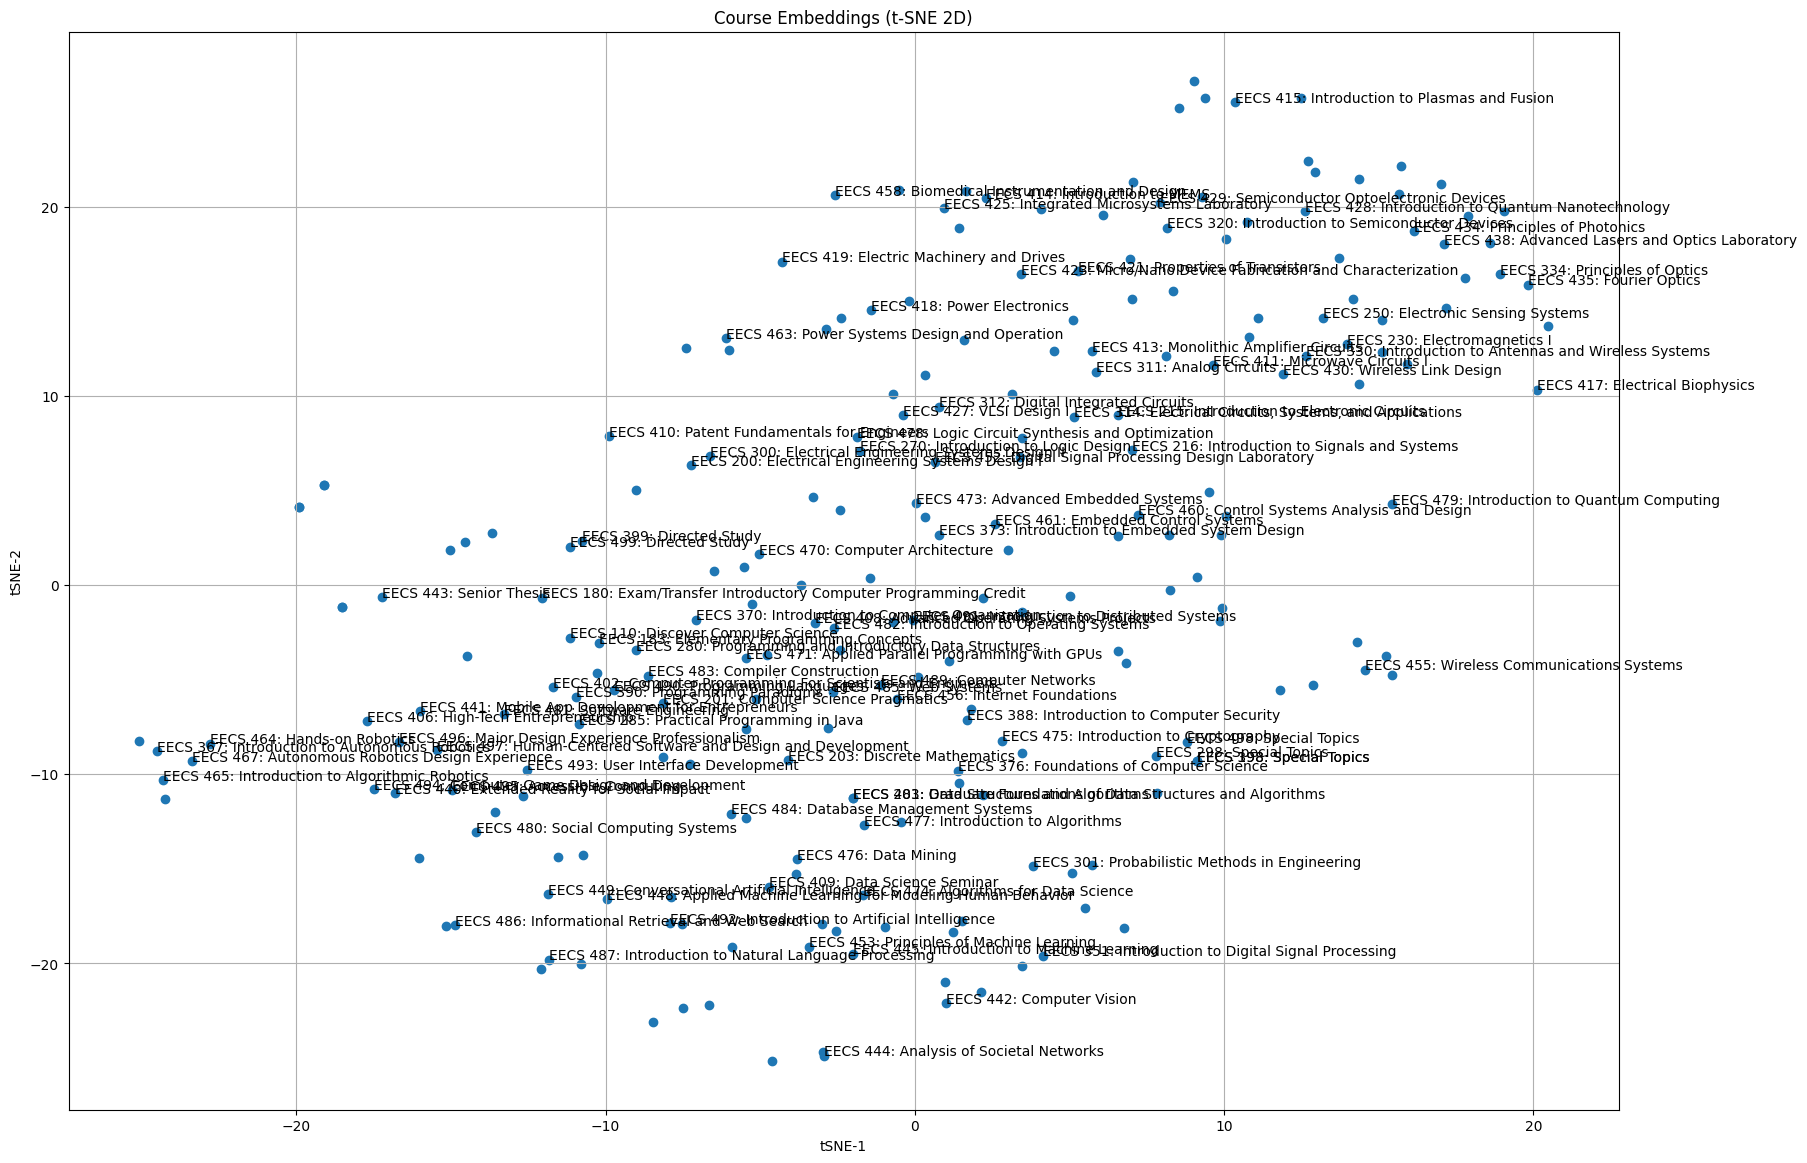

In [6]:
from sklearn.manifold import TSNE
# Visualize embeddings using t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(20, 14))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1])
for i, (course_number, row) in enumerate(df_undergrad.iterrows()):
    label = f"{course_number}: {row['course_name']}"
    plt.annotate(label, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
plt.title('Course Embeddings (t-SNE 2D)')
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.grid(True)
plt.show()

## UMAP

/Users/kevinxu/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kevinxu/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


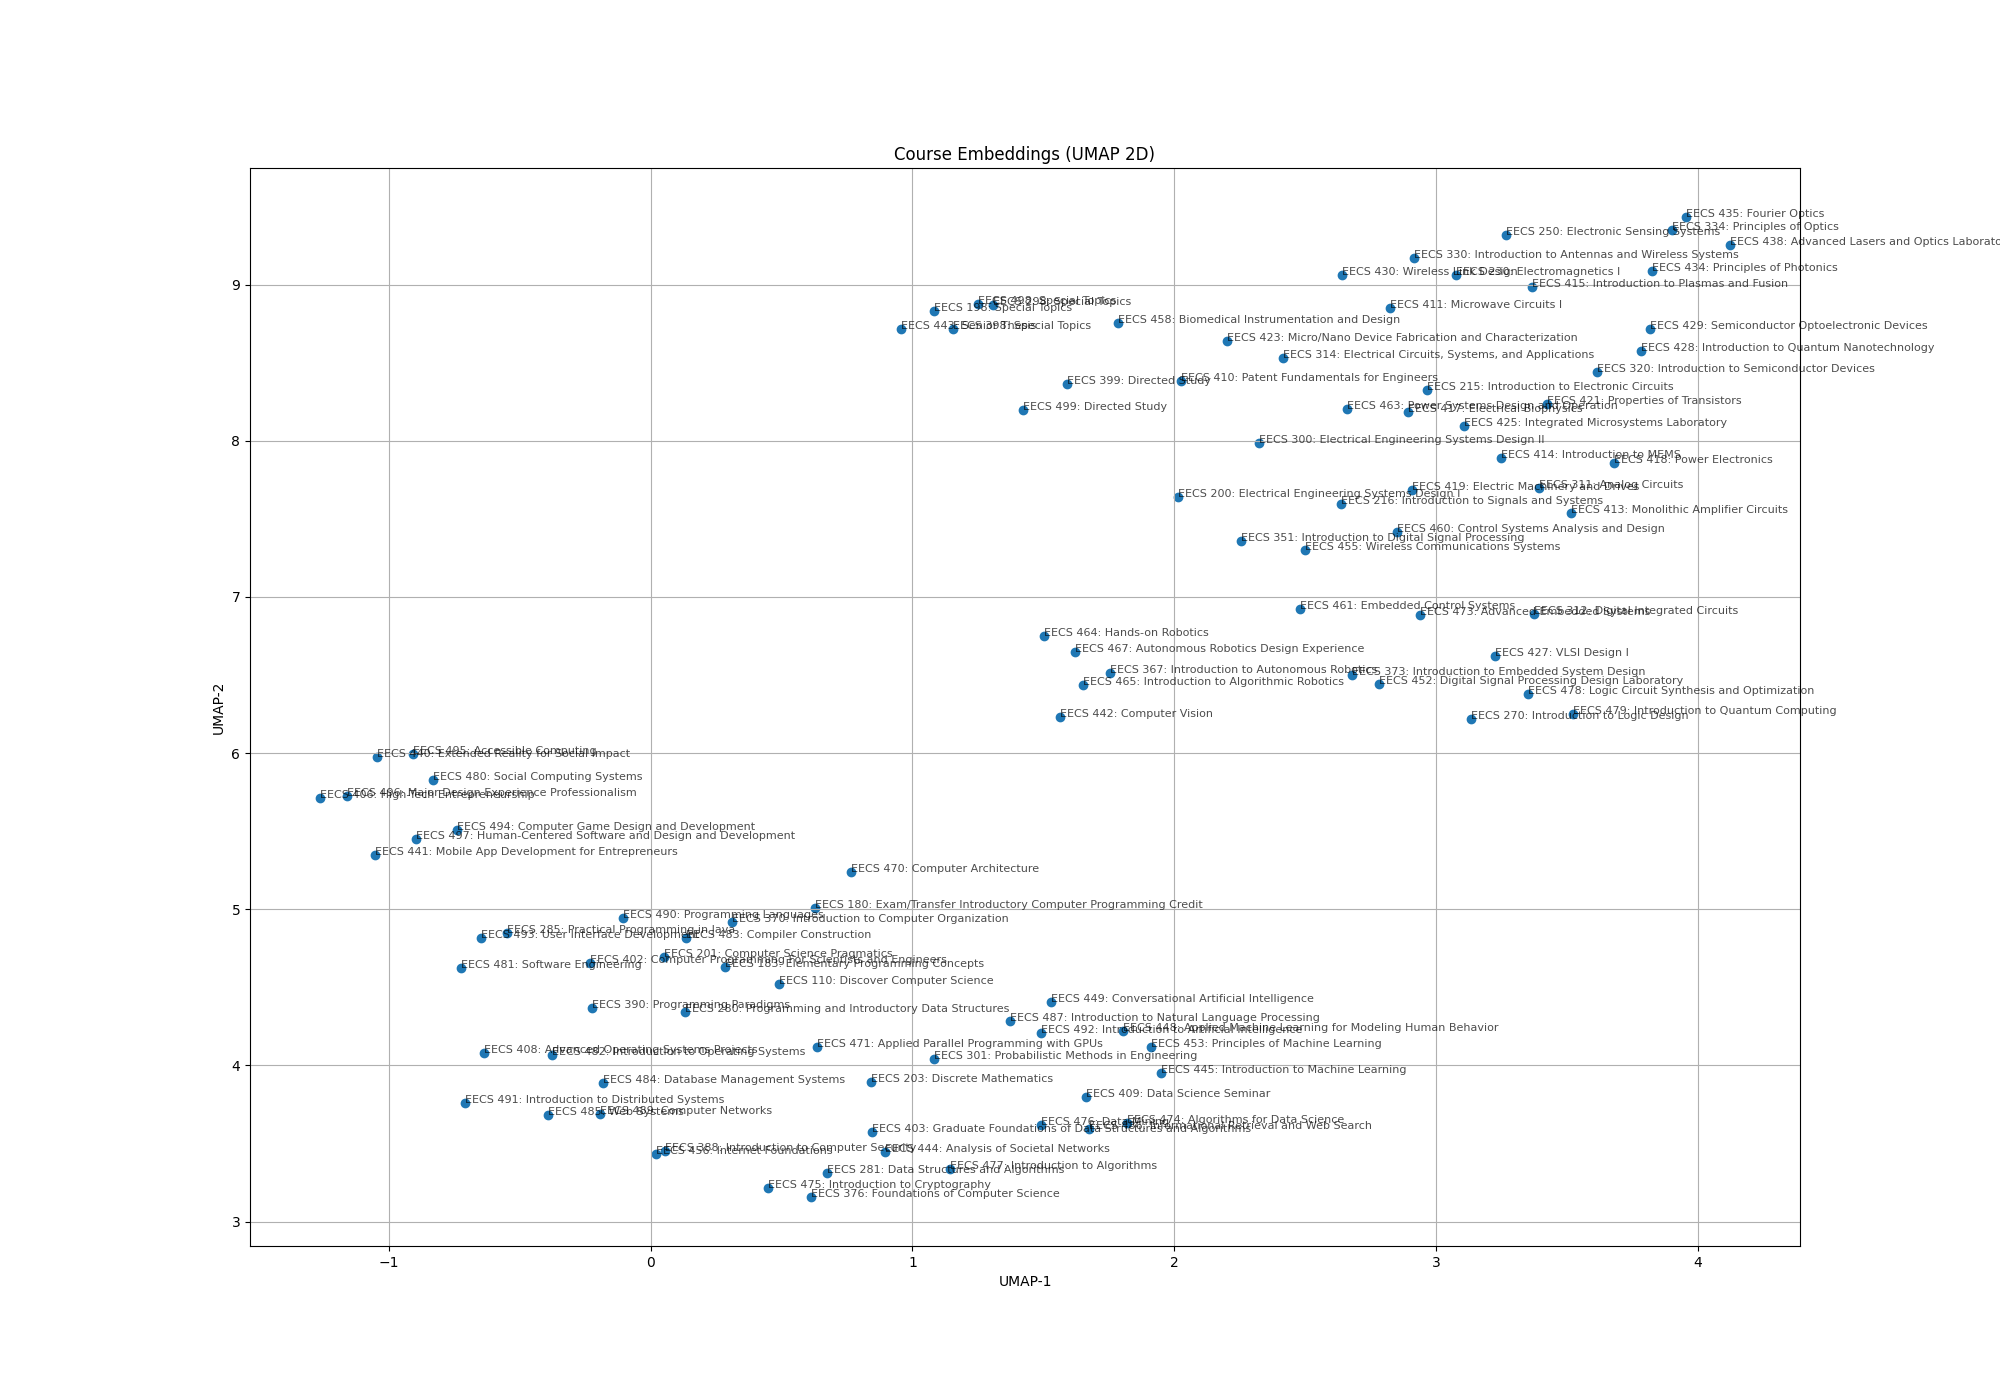

In [37]:
# Visualize embeddings using UMAP (2D)
umap_model_2d = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model_2d.fit_transform(embeddings)

plt.figure(figsize=(20, 14))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1])
for i, (course_number, row) in enumerate(df_undergrad.iterrows()):
    label = f"{course_number}: {row['course_name']}"
    plt.annotate(label, (embeddings_umap[i, 0], embeddings_umap[i, 1]), fontsize=8, alpha=0.7)
plt.title('Course Embeddings (UMAP 2D)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.grid(True)
plt.show()

In [19]:
%matplotlib widget

/Users/kevinxu/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kevinxu/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


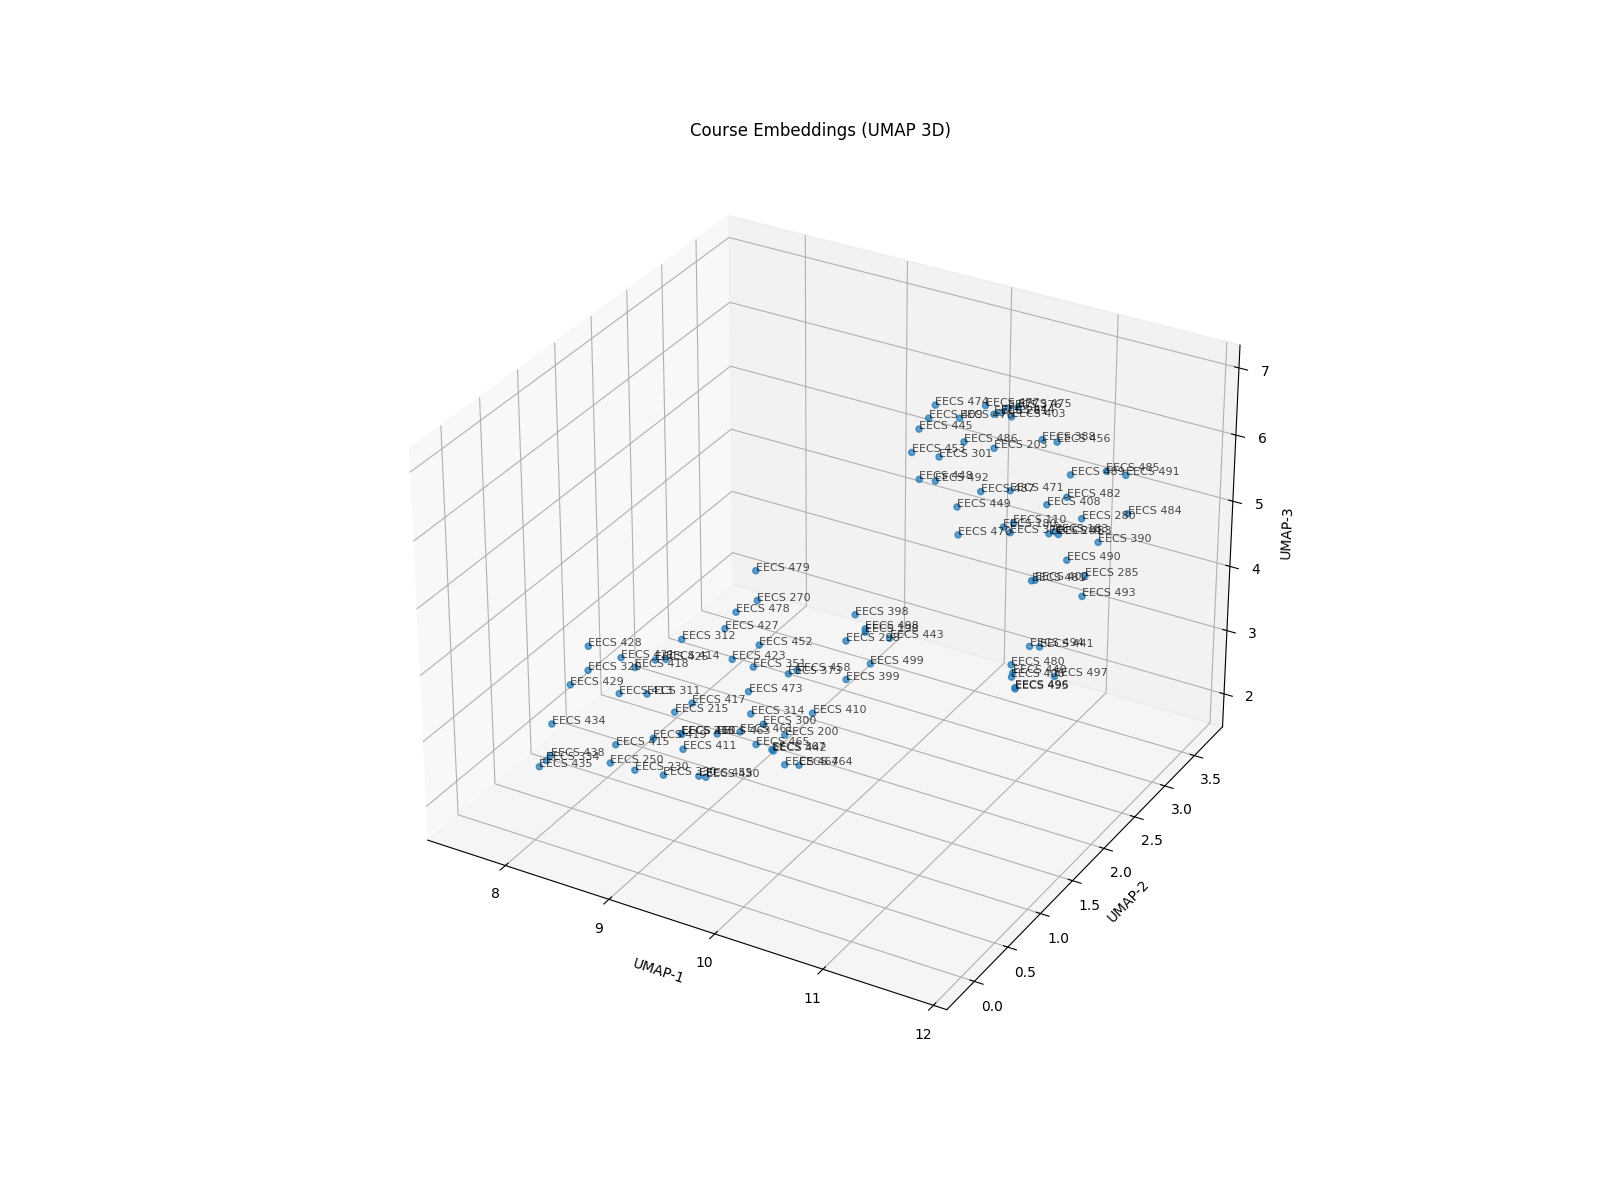

In [46]:
import ipywidgets as widgets
from IPython.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Visualize embeddings using UMAP (3D)
umap_model_3d = umap.UMAP(n_components=3, random_state=42)
embeddings_umap_3d = umap_model_3d.fit_transform(embeddings)

fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_umap_3d[:, 0], embeddings_umap_3d[:, 1], embeddings_umap_3d[:, 2], alpha=0.7)

for i, (course_number, row) in enumerate(df_undergrad.iterrows()):
    label = f"{course_number}"
    # label = f"{course_number}: {row['course_name']}"
    ax.text(embeddings_umap_3d[i, 0], embeddings_umap_3d[i, 1], embeddings_umap_3d[i, 2], label, fontsize=8, alpha=0.7)

ax.set_title('Course Embeddings (UMAP 3D)')
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_zlabel('UMAP-3')
fig.set_size_inches(16, 12)
plt.show()

In [ ]:
# Combine df_undergrad and embeddings_umap_3d into a single DataFrame
df_umap3d = df_undergrad.copy()
df_umap3d[['UMAP_1', 'UMAP_2', 'UMAP_3']] = embeddings_umap_3d

# Write to CSV
df_umap3d.to_csv(f"{filename2.parent}/{filename2.stem}_umap3d.csv")